1. Import libraries

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

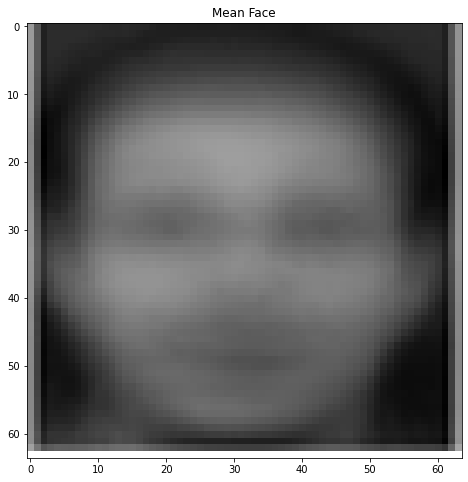

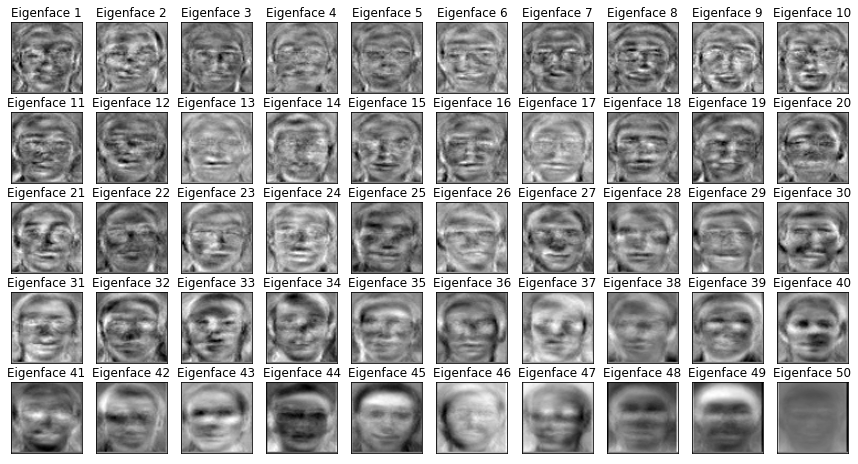

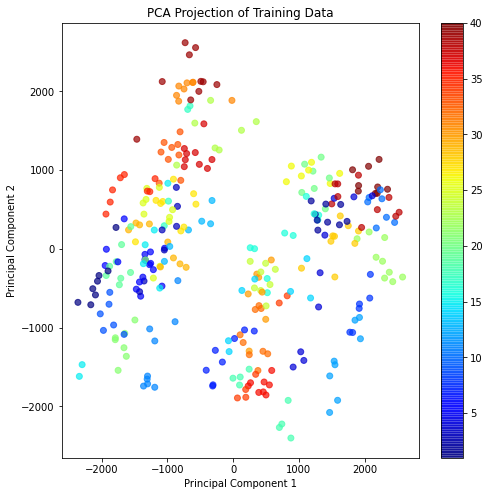

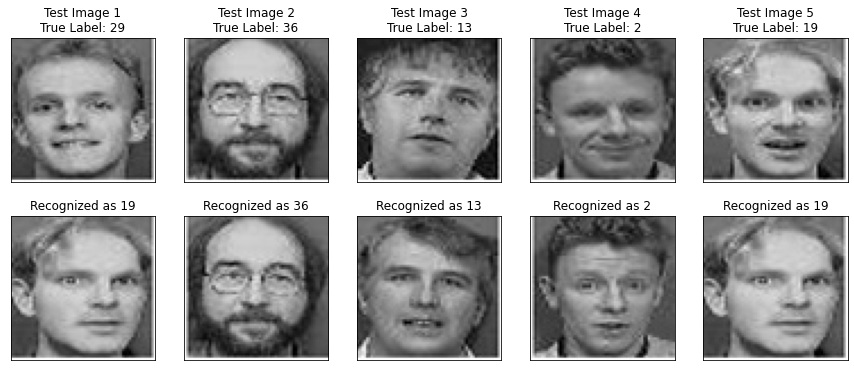

Accuracy: 0.94


In [2]:
import numpy as np
import os
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
import re
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('L').resize((64, 64))  # 转换为灰度图并调整大小
            img_array = np.array(img).flatten()  # 展开为一维向量
            person_id = int(re.split(r'[_.]', filename)[0])
            images.append(img_array)
            labels.append(person_id)
    
    return np.array(images), np.array(labels)

# 加载数据
X, y = load_images_from_folder('data')

# 将数据划分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 计算平均脸
mean_face = np.mean(X_train, axis=0)

# 去均值人脸
X_train_centered = X_train - mean_face

# 计算 X.T * X
cov_matrix = np.dot(X_train_centered.T, X_train_centered)

# 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# 选择前 k 个特征向量
k = 50
top_eigenvectors = eigenvectors[:, -k:]

# 计算每个图片向量的坐标
X_train_pca = np.dot(X_train_centered, top_eigenvectors)

# 输入新图片进行测试并计算新图片的坐标
def project_face(face_vector):
    face_centered = face_vector - mean_face
    return np.dot(face_centered, top_eigenvectors)

def recognize_face(test_face):
    test_face_pca = project_face(test_face)
    similarities = cosine_similarity(X_train_pca, [test_face_pca])
    most_similar_index = np.argmax(similarities)
    return y_train[most_similar_index]

# 可视化 1：平均脸
plt.figure(figsize=(8, 8))
plt.imshow(mean_face.reshape(64, 64), cmap='gray')
plt.title("Mean Face")
plt.show()

# 可视化 2：前几个特征脸 (Top Eigenfaces)
eigenfaces = top_eigenvectors.T.reshape((k, 64, 64))
fig, axes = plt.subplots(5, 10, figsize=(15, 8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f"Eigenface {i+1}")
plt.show()

# 可视化 3：降维后的数据分布 (PCA Projection)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_pca)
plt.figure(figsize=(8, 8))
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='jet', alpha=0.7)
plt.colorbar(scatter)
plt.title("PCA Projection of Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 可视化 4：测试图片与识别结果对比 (Test Image vs. Recognized Image)
def visualize_test_results(X_test, y_test, mean_face, top_eigenvectors, X_train_pca, y_train):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={'xticks':[], 'yticks':[]})
    for i in range(5):
        test_face = X_test[i]
        prediction = recognize_face(test_face)
        
        # 显示测试图片
        axes[0, i].imshow(test_face.reshape(64, 64), cmap='gray')
        axes[0, i].set_title(f"Test Image {i+1}\nTrue Label: {y_test[i]}")
        
        # 显示识别出的最相似训练图片
        most_similar_train_face = X_train[np.where(y_train == prediction)[0][0]]
        axes[1, i].imshow(most_similar_train_face.reshape(64, 64), cmap='gray')
        axes[1, i].set_title(f"Recognized as {prediction}")
    
    plt.show()

# 调用函数显示测试结果对比
visualize_test_results(X_test, y_test, mean_face, top_eigenvectors, X_train_pca, y_train)

# 测试模型准确性
correct = 0
for i, test_face in enumerate(X_test):
    prediction = recognize_face(test_face)
    if prediction == y_test[i]:
        correct += 1

accuracy = correct / len(X_test)
print(f"Accuracy: {accuracy:.2f}")


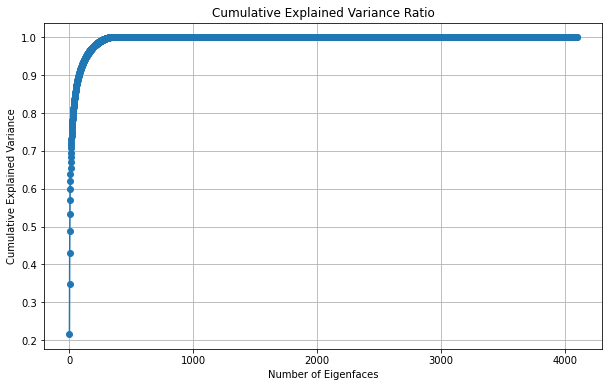

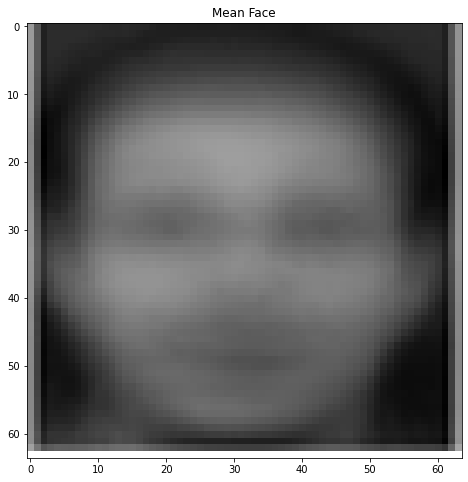

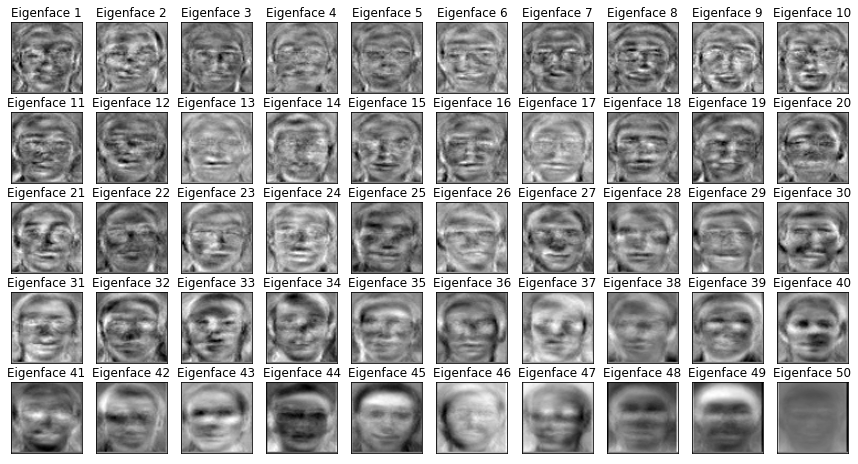

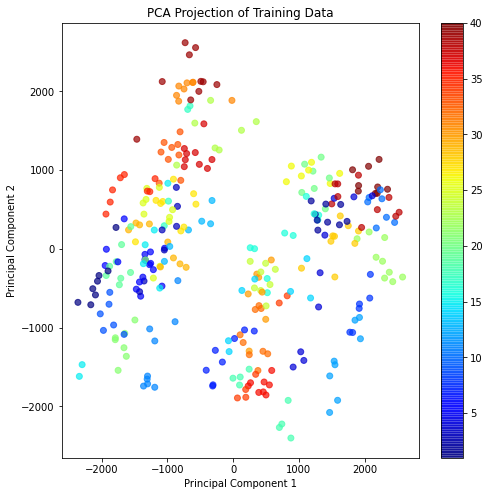

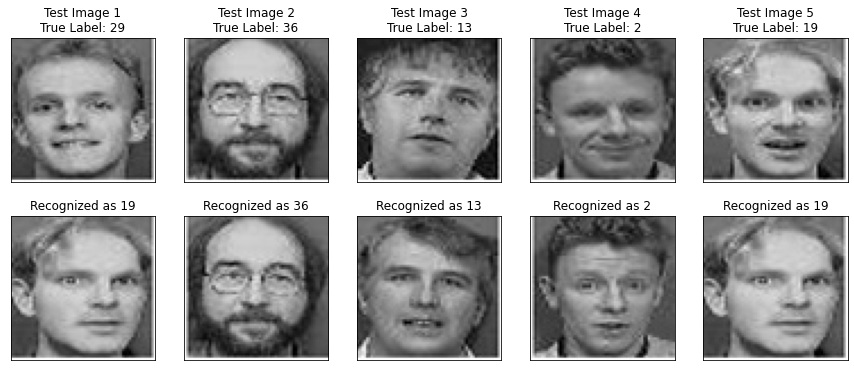

Accuracy: 0.94


In [3]:
import numpy as np
import os
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
import re
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('L').resize((64, 64))  # 转换为灰度图并调整大小
            img_array = np.array(img).flatten()  # 展开为一维向量
            person_id = int(re.split(r'[_.]', filename)[0])
            images.append(img_array)
            labels.append(person_id)
    
    return np.array(images), np.array(labels)

# 加载数据
X, y = load_images_from_folder('data')

# 将数据划分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 计算平均脸
mean_face = np.mean(X_train, axis=0)

# 去均值人脸
X_train_centered = X_train - mean_face

# 计算 X.T * X
cov_matrix = np.dot(X_train_centered.T, X_train_centered)

# 计算特征值和特征向量
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# 计算累计方差解释率
explained_variances = eigenvalues / np.sum(eigenvalues)
cumulative_explained_variances = np.cumsum(explained_variances[::-1])

# 可视化累计方差解释率
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variances, marker='o')
plt.title("Cumulative Explained Variance Ratio")
plt.xlabel("Number of Eigenfaces")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# 选择前 k 个特征向量
k = 50
top_eigenvectors = eigenvectors[:, -k:]

# 计算每个图片向量的坐标
X_train_pca = np.dot(X_train_centered, top_eigenvectors)

# 输入新图片进行测试并计算新图片的坐标
def project_face(face_vector):
    face_centered = face_vector - mean_face
    return np.dot(face_centered, top_eigenvectors)

def recognize_face(test_face):
    test_face_pca = project_face(test_face)
    similarities = cosine_similarity(X_train_pca, [test_face_pca])
    most_similar_index = np.argmax(similarities)
    return y_train[most_similar_index]

# 可视化 1：平均脸
plt.figure(figsize=(8, 8))
plt.imshow(mean_face.reshape(64, 64), cmap='gray')
plt.title("Mean Face")
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(mean_face.reshape(64, 64), cmap='gray')
plt.title("Mean Face")
plt.show()

# 可视化 2：前几个特征脸 (Top Eigenfaces)
eigenfaces = top_eigenvectors.T.reshape((k, 64, 64))
fig, axes = plt.subplots(5, 10, figsize=(15, 8), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f"Eigenface {i+1}")
plt.show()

# 可视化 3：降维后的数据分布 (PCA Projection)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_pca)
plt.figure(figsize=(8, 8))
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='jet', alpha=0.7)
plt.colorbar(scatter)
plt.title("PCA Projection of Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 可视化 4：测试图片与识别结果对比 (Test Image vs. Recognized Image)
def visualize_test_results(X_test, y_test, mean_face, top_eigenvectors, X_train_pca, y_train):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={'xticks':[], 'yticks':[]})
    for i in range(5):
        test_face = X_test[i]
        prediction = recognize_face(test_face)
        
        # 显示测试图片
        axes[0, i].imshow(test_face.reshape(64, 64), cmap='gray')
        axes[0, i].set_title(f"Test Image {i+1}\nTrue Label: {y_test[i]}")
        
        # 显示识别出的最相似训练图片
        most_similar_train_face = X_train[np.where(y_train == prediction)[0][0]]
        axes[1, i].imshow(most_similar_train_face.reshape(64, 64), cmap='gray')
        axes[1, i].set_title(f"Recognized as {prediction}")
    
    plt.show()

# 调用函数显示测试结果对比
visualize_test_results(X_test, y_test, mean_face, top_eigenvectors, X_train_pca, y_train)

# 测试模型准确性
correct = 0
for i, test_face in enumerate(X_test):
    prediction = recognize_face(test_face)
    if prediction == y_test[i]:
        correct += 1

accuracy = correct / len(X_test)
print(f"Accuracy: {accuracy:.2f}")
